In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_classif
from sklearn.svm import SVR
from sklearn.decomposition import PCA
import scipy
from sklearn.ensemble import RandomForestClassifier

In [ ]:
auto_df=pd.read_csv('auto-mpg.csv')
auto_df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


In [ ]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
auto_df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model year      0
origin          0
car name        0
dtype: int64

In [ ]:
auto_df[auto_df['horsepower']=='?']

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
32,25.0,4,98.0,?,2046,19.0,71,1,ford pinto
126,21.0,6,200.0,?,2875,17.0,74,1,ford maverick
330,40.9,4,85.0,?,1835,17.3,80,2,renault lecar deluxe
336,23.6,4,140.0,?,2905,14.3,80,1,ford mustang cobra
354,34.5,4,100.0,?,2320,15.8,81,2,renault 18i
374,23.0,4,151.0,?,3035,20.5,82,1,amc concord dl


In [ ]:
auto_df['horsepower']=auto_df['horsepower'].astype('float')

In [ ]:
auto_df.replace('?',np.NAN,inplace=True)
auto_df.replace(np.NAN,np.mean(auto_df['horsepower']),inplace=True)

In [ ]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
car name         object
dtype: object

In [ ]:
auto_df=auto_df.drop(['car name'],axis=1)

In [ ]:
auto_df.dtypes

mpg             float64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
model year        int64
origin            int64
dtype: object

In [ ]:
auto_df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.469388,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.199187,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,95.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


In [ ]:
X=auto_df[['cylinders','displacement','horsepower','weight','acceleration','model year','origin']]
Y=auto_df['mpg']

In [ ]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=0)

regressor=LinearRegression()
regressor.fit(X_train,Y_train)
print("Train ACC: ",regressor.score(X_train,Y_train))
Y_pred=regressor.predict(X_test)
print("Test ACC: ",regressor.score(X_test,Y_test))

Train ACC:  0.8191918227641206
Test ACC:  0.8166486776392308


RFE

In [ ]:
estimator = SVR(kernel="linear")
#Use RFE to remove not significant features from the initial model.
selector = RFE(estimator,n_features_to_select=5,step=1)
selector = selector.fit(X_train,Y_train)
print(selector.support_)
selector.score(X_train,Y_train)



[ True False  True False  True  True  True]


0.7523003046438317

In [ ]:
mask = selector.support_#list of booleans for selected features
new_featr = []
for bool, feature in zip(mask, ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']):
 if bool:
     new_featr.append(feature)
new_featr

['cylinders', 'horsepower', 'acceleration', 'model year', 'origin']

KBest

In [ ]:
X_rbest=auto_df[['cylinders','horsepower','acceleration','model year','origin']]
Y_rbest=auto_df['mpg']

X_rtrain,X_rtest,Y_rtrain,Y_rtest=train_test_split(X_rbest,Y_rbest,test_size=0.3,random_state=0)
regressorr=LinearRegression()
regressorr.fit(X_rtrain,Y_rtrain)
print("Train ACC",regressorr.score(X_rtrain,Y_rtrain))
Y_pred=regressorr.predict(X_rtest)
print("Test ACC: ",regressorr.score(X_rtest,Y_rtest))

Train ACC 0.76776021767823
Test ACC:  0.7607510900529849


In [ ]:
# Create and fit selector
X_best= SelectKBest(f_classif, k=6).fit(X_train, Y_train)
print(X_best.scores_)
mask = X_best.get_support() #list of booleans for selected features
new_feat = []
for bool, feature in zip(mask, ['cylinders','displacement','horsepower','weight','acceleration','model year','origin']):
 if bool:
     new_feat.append(feature)
new_feat

[ 8.45309431  9.66178257  7.73184341 12.43476224  1.87910815  3.10017883
  2.83121573]


['cylinders', 'displacement', 'horsepower', 'weight', 'model year', 'origin']

In [ ]:
X_kbest=auto_df[['cylinders','displacement','horsepower','weight','model year','origin']]
Y_kbest=auto_df['mpg']

X_ktrain,X_ktest,Y_ktrain,Y_ktest=train_test_split(X_kbest,Y_kbest,test_size=0.3,random_state=0)
regressork=LinearRegression()
regressork.fit(X_ktrain,Y_ktrain)
print("Train ACC",regressork.score(X_ktrain,Y_ktrain))
Y_pred=regressork.predict(X_ktest)
print("Test ACC: ",regressork.score(X_ktest,Y_ktest))

Train ACC 0.8173678993496245
Test ACC:  0.8202682013786212


PCA

In [ ]:
pca = PCA(0.95)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=0.95, random_state=None,
    svd_solver='auto', tol=0.0, whiten=False)

In [ ]:
x_ptrain = pca.transform(X_train)
x_ptest = pca.transform(X_test)

In [ ]:
regressor_pca=LinearRegression()
regressor_pca.fit(x_ptrain,Y_train)
print("Train ACC: ",regressor_pca.score(x_ptrain,Y_train))
Y_pred=regressor_pca.predict(x_ptest)
print("Test ACC: ",regressor_pca.score(x_ptest,Y_test))

Train ACC:  0.6826455994323246
Test ACC:  0.7120259597929584


Correlation

In [ ]:
for i in auto_df.columns:
      print("the r and p value for "+i+" and mpg respectively is {}".format(scipy.stats.pearsonr(auto_df[i],auto_df['mpg'])))

the r and p value for mpg and mpg respectively is (0.9999999999999999, 0.0)
the r and p value for cylinders and mpg respectively is (-0.7753962854205542, 4.503992246177055e-81)
the r and p value for displacement and mpg respectively is (-0.8042028248058978, 1.6558889101930157e-91)
the r and p value for horsepower and mpg respectively is (-0.7714371350025526, 9.255477533166725e-80)
the r and p value for weight and mpg respectively is (-0.831740933244335, 2.9727995640500577e-103)
the r and p value for acceleration and mpg respectively is (0.4202889121016507, 1.823091535078553e-18)
the r and p value for model year and mpg respectively is (0.5792671330833096, 4.844935813365483e-37)
the r and p value for origin and mpg respectively is (0.5634503597738431, 1.0114822102336483e-34)


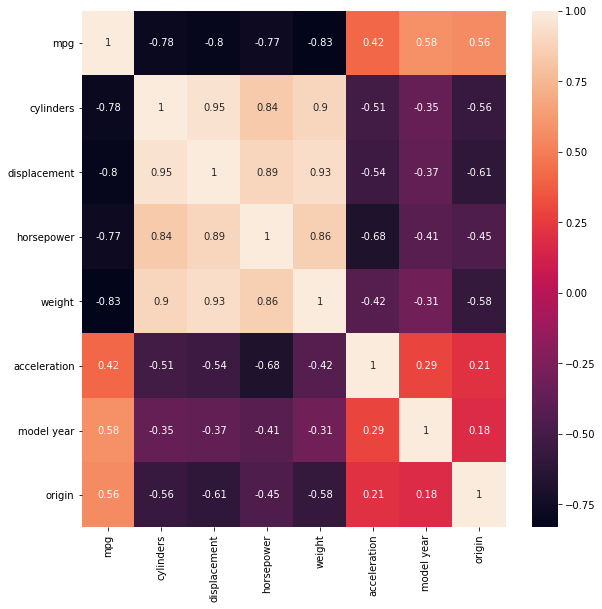

In [ ]:
corr = auto_df.corr()
plt.figure(figsize=(9.5,9.5))
sns.heatmap(auto_df.corr(),annot=True)

In [ ]:
abs(auto_df.corr(method='pearson')['mpg']).sort_values(ascending = False)

mpg             1.000000
weight          0.831741
displacement    0.804203
cylinders       0.775396
horsepower      0.771437
model year      0.579267
origin          0.563450
acceleration    0.420289
Name: mpg, dtype: float64

In [ ]:
x_prc_train=X_train[['weight','displacement','cylinders','horsepower','model year']]
x_prc_test=X_test[['weight','displacement','cylinders','horsepower','model year']]

In [ ]:
regressor_prc=LinearRegression()
regressor_prc.fit(x_prc_train,Y_train)
print("Train ACC: ",regressor_prc.score(x_prc_train,Y_train))
Y_pred=regressor_prc.predict(x_prc_test)
print("Test ACC: ",regressor_prc.score(x_prc_test,Y_test))

Train ACC:  0.8051889298217018
Test ACC:  0.8088898876225457
